# Basic example

This notebook analyses and visualizes the results of a `libE_opt` optimization.

### Initialize the class for post processing and loads history data

In [9]:
import numpy as np
from libe_opt_postproc import PostProcOptimization

# Modify the path below, to point to your optimization
# pp = PostProcOptimization('/beegfs/desy/group/mpa/mpa1/delaossa/wake_t/lux_opt')
pp = PostProcOptimization('.')

When only the path is passed to PostProcOptimization, it would try to find out the specific variables of your optimization by searching the `varying_parameters.py` file.
If not present, the user would need to tell manually which are those, e.g.: `pp = PostProcOptimization('path', varpars=['x0', 'x1', ...])`

### Plotting optimization run versus time

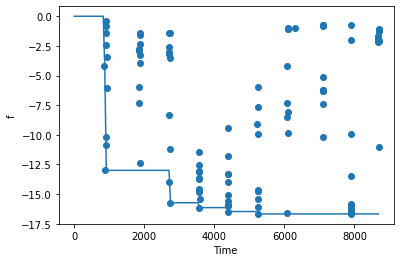

In [11]:
pp.plot_optimization()
t0 = np.linspace(0, pp.get_df()['returned_time'].max(), 200 )
pp.get_trace(plot=True, t_array=t0);

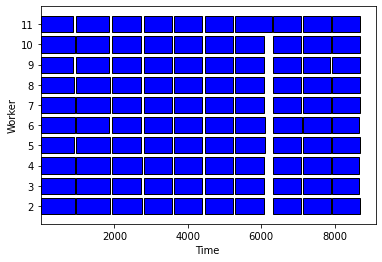

In [12]:
pp.plot_worker_timeline()

### Plotting history file

Selecting according to the condition:  f < -15.000000


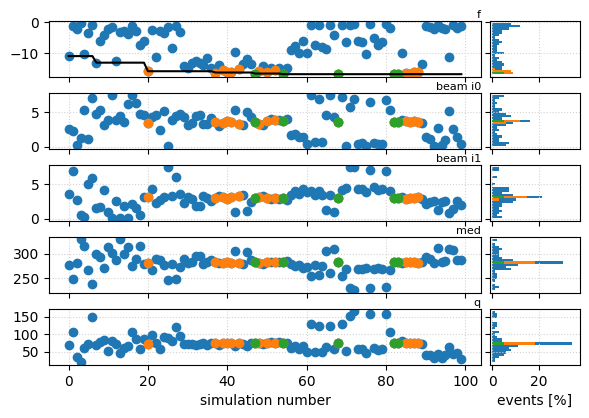

In [13]:
# manually select the parameters to show
pp.plot_history(parnames=['f', 'beam_i0', 'beam_i1', 'med', 'q'], select={'f': [None, -15]}, top=5)

Selecting according to the condition:  f < -15.000000


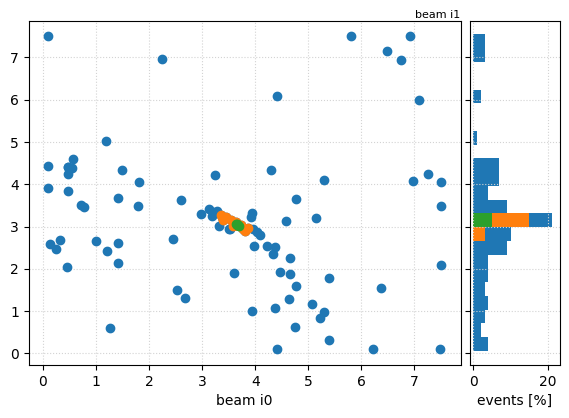

In [14]:
pp.plot_history(parnames=['beam_i1'], xname='beam_i0', select={'f':[None, -15]}, top=5)

### Show GP model

[INFO 04-01 18:10:11] ax.service.utils.instantiation: Created search space: SearchSpace(parameters=[RangeParameter(name='beam_i0', parameter_type=FLOAT, range=[0.1, 7.5]), RangeParameter(name='beam_i1', parameter_type=FLOAT, range=[0.1, 7.5])], parameter_constraints=[]).


Plotting the model in the beam_i1 vs beam_i0 plane


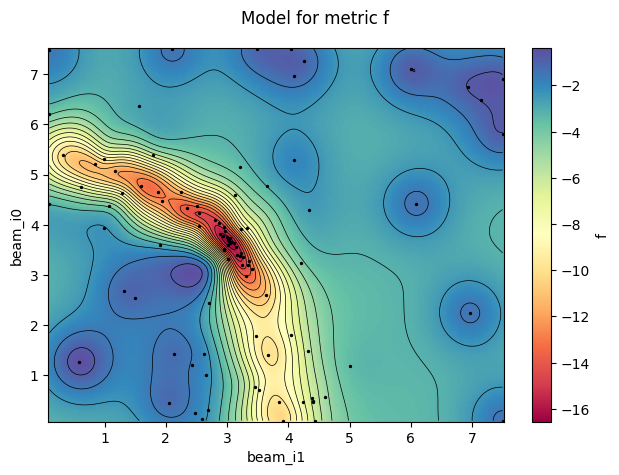

In [15]:
# Use data present in the history file to build a GP model with Ax.
# By default, the model is build for the score function `f`
mm = pp.build_model()

# Plot the model in 2D. 
# One can specify manually by setting the arguments `xname` and `yname` in `plot_model()`
# By default it takes the two first varying parameters in the list.
# The rest of parameters are fixed to the optimal value.
mm.plot_model(xname='beam_i1', yname='beam_i0')

#### Get optimum point data

In [16]:
# Get optimum according the model (this does not necessarily coincides with the minimum from data)
best_arm, best_point_predictions = mm.model.model_best_point()
best_pars = best_arm.parameters
print(best_arm)
print(best_pars)

Arm(name='83_0', parameters={'beam_i0': 3.670100437277201, 'beam_i1': 3.0246930851729474})
{'beam_i0': 3.670100437277201, 'beam_i1': 3.0246930851729474}


In [17]:
# Alternative: evaluate the model over the data sample
df = pp.get_df()
sample = df[pp.varpars] # Use history data as the sample to evaluate
f, _ = mm.evaluate_model(sample)
df['fm'] = f  # add model evaluation to data as column
idx_best_data = df['f'].idxmin()  # get index of the data point with smallest f
idx_best_model = df['fm'].idxmin()  # get index of the data point with smallest model f
varlist = ['f', 'fm', 'beam_i0', 'beam_i1', 'med', 'mad_rel', 'q']
print('data index where f is minimum: ', idx_best_data)
# print(sample.loc[idx_best_data])
for var in varlist:
    print('%10s = %10f' % (var, df.loc[idx_best_data][var]))
print('\ndata index where model is minimum: ', idx_best_model)
# print(sample.loc[idx_best_model])
for var in varlist:
    print('%10s = %10f' % (var, df.loc[idx_best_model][var]))

data index where f is minimum:  54
         f = -16.667123
        fm = -16.514673
   beam_i0 =   3.693381
   beam_i1 =   3.021622
       med = 282.680687
   mad_rel =   0.516917
         q =  74.227208

data index where model is minimum:  83
         f = -16.558818
        fm = -16.566070
   beam_i0 =   3.670100
   beam_i1 =   3.024693
       med = 282.685832
   mad_rel =   0.519491
         q =  73.997109
